In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('movies.csv',lineterminator='\n')
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


In [3]:
df.isnull().sum()

Unnamed: 0              0
id                      0
original_language       0
original_title          0
popularity              0
release_date           38
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 0
runtime                 9
tagline              2920
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   id                 10000 non-null  int64  
 2   original_language  10000 non-null  object 
 3   original_title     10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9962 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  int64  
 8   genre              10000 non-null  object 
 9   overview           9900 non-null   object 
 10  revenue            10000 non-null  int64  
 11  runtime            9991 non-null   float64
 12  tagline            7080 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [5]:
df = df.dropna()

In [6]:
df['Year'] = df['release_date'].apply(lambda x:x[0:4])
df

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline,Year
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...,2021
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits.",2021
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend.",2021
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.,2021
5,5,574060,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347,"['Action', 'Thriller', 'Crime']",In her turbulent life as a professional assass...,344931,114.0,Revenge is best served ice cold.,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,28752,en,The Curse of the Werewolf,9.017,1961-05-01,6.6,110,['Horror'],A child conceived after a demented beggar rape...,0,93.0,HALF-MAN... HALF-WOLF... COMPELLED BY THE HIDE...,1961
9996,9996,15934,en,El cantante,10.417,2006-09-12,7.0,80,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0,116.0,"Based on the true story of the King of Salsa, ...",2006
9997,9997,162215,en,How I Live Now,9.520,2013-09-10,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0,101.0,Love will lead you home,2013
9998,9998,5723,en,Once,9.267,2007-03-23,7.4,990,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513,85.0,How often do you find the right person?,2007


Text(0.5, 1.0, 'Popular Movies')

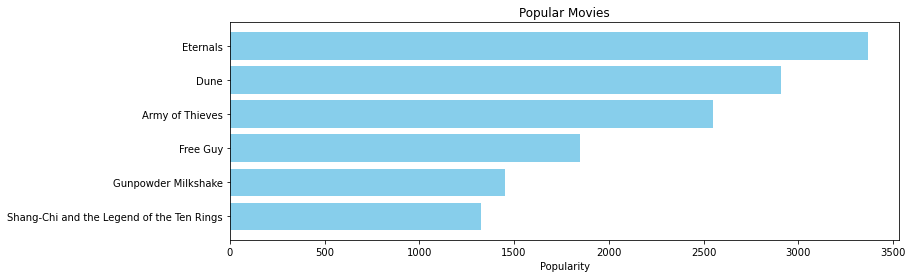

In [8]:
pop= df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

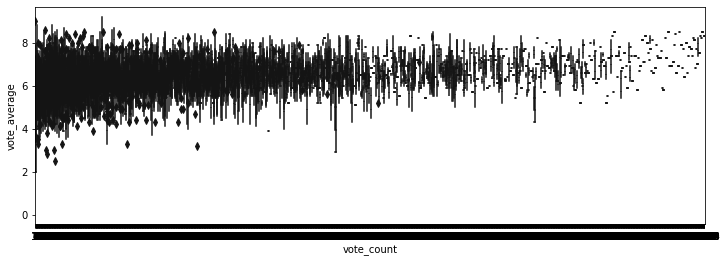

In [9]:
fig, (ax) = plt.subplots(ncols=1, figsize=(12,4))
s = sns.boxplot(x='vote_count', y="vote_average", data=df, palette="Greens",showfliers=True)
plt.show()

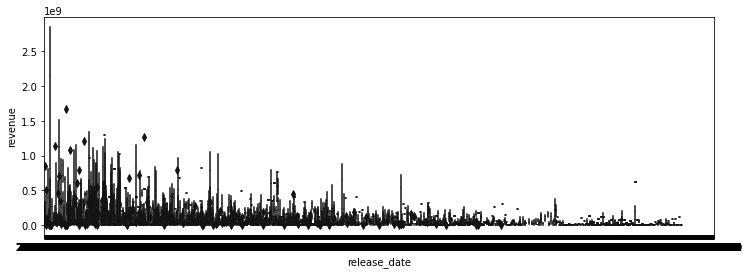

In [12]:
fig, (ax) = plt.subplots(ncols=1, figsize=(12,4))
s = sns.boxplot(x='release_date', y="revenue", data=df, palette="Greens",showfliers=True)
plt.show()

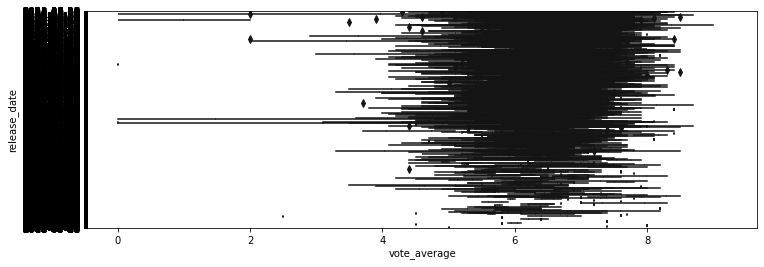

In [13]:
fig, (ax) = plt.subplots(ncols=1, figsize=(12,4))
s = sns.boxplot(x='vote_average', y="release_date", data=df, palette="Greens",showfliers=True)
plt.show()

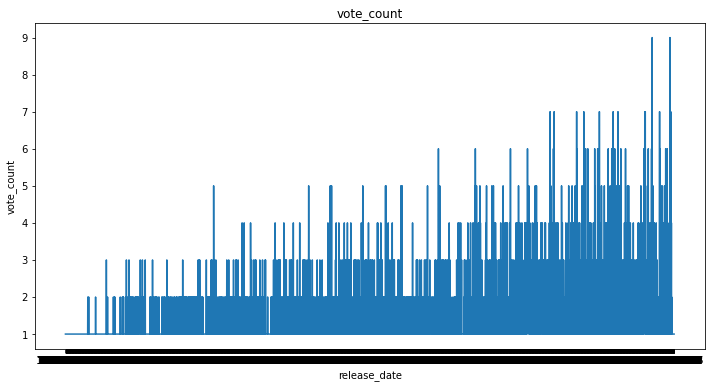

In [15]:
dt = df.groupby(['release_date'])['vote_average'].count().reset_index()
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['release_date'],dt['vote_average']); plt.xlabel('release_date'); plt.ylabel('vote_count'); plt.title('vote_count')
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7072, 23119)

In [18]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [19]:
indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()

In [20]:
def get_recommendations(original_title, cosine_sim=cosine_sim):
    idx = indices[original_title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['original_title'].iloc[movie_indices]

In [32]:
get_recommendations('Eternals')

622                   Jupiter Ascending
68                    Godzilla vs. Kong
8790                    Jurassic Galaxy
3069      The Day the Earth Stood Still
1298                   The Darkest Hour
4073    Star Trek V: The Final Frontier
2028                  The Fifth Element
3837            Star Trek: Insurrection
888                      Men in Black 3
53                     The Tomorrow War
Name: original_title, dtype: object